In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Realizar carga de imagenes
- Se tiene en cuenta que las imágenes han sido cargadas en orden BGR

In [11]:
img = cv.imread('Material_TPs\TP1\coord_cromaticas\CoordCrom_1.png')
img2 = cv.imread('Material_TPs\TP1\coord_cromaticas\CoordCrom_2.png')
img3 = cv.imread('Material_TPs\TP1\coord_cromaticas\CoordCrom_3.png')

## Definir la función
- Dentro de la función se transforma la imagen que recibe como parametro en formato RGB, se procede a sacar cada uno de sus canales con la función split()
- se procede a hallar el valor de los nuevos canales rgb (siguiente formula) y se usa la función merge para ponerlos en una sola imagen

$$(R, G, B) = \left(\frac{R}{R+G+B}, \frac{G}{R+G+B}, \frac{B}{R+G+B}\right)$$

In [24]:
def coor_cromaticas(img):
    img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    R, G, B = cv.split(img)
    r = R / (R + G + B)
    g = G / (R + G + B)
    b = B / (R + G + B)
    img3 = cv.merge((b, g, r))
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].imshow(img2)
    axs[0].set_title('Imagen original')
    axs[1].imshow(img3)
    axs[1].set_title('Imagen con coordenadas cromáticas')
    plt.show()


C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:4: RuntimeWarning: divide by zero encountered in divide
  r = R / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:4: RuntimeWarning: invalid value encountered in divide
  r = R / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:5: RuntimeWarning: divide by zero encountered in divide
  g = G / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:5: RuntimeWarning: invalid value encountered in divide
  g = G / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:6: RuntimeWarning: divide by zero encountered in divide
  b = B / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:6: RuntimeWarning: invalid value encountered in divide
  b = B / (R + G + B)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
c:\ProgramData\Anaconda3\envs\deepLearning\lib\

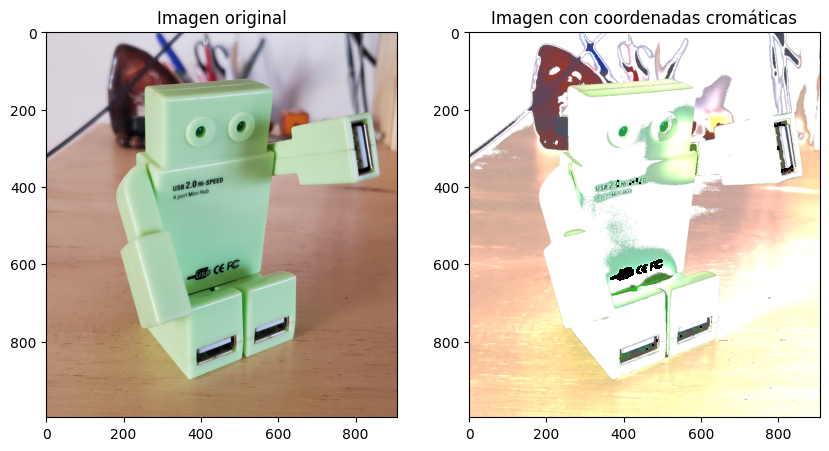

In [25]:
coor_cromaticas(img)

C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:4: RuntimeWarning: divide by zero encountered in divide
  r = R / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:4: RuntimeWarning: invalid value encountered in divide
  r = R / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:5: RuntimeWarning: divide by zero encountered in divide
  g = G / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:5: RuntimeWarning: invalid value encountered in divide
  g = G / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:6: RuntimeWarning: divide by zero encountered in divide
  b = B / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:6: RuntimeWarning: invalid value encountered in divide
  b = B / (R + G + B)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


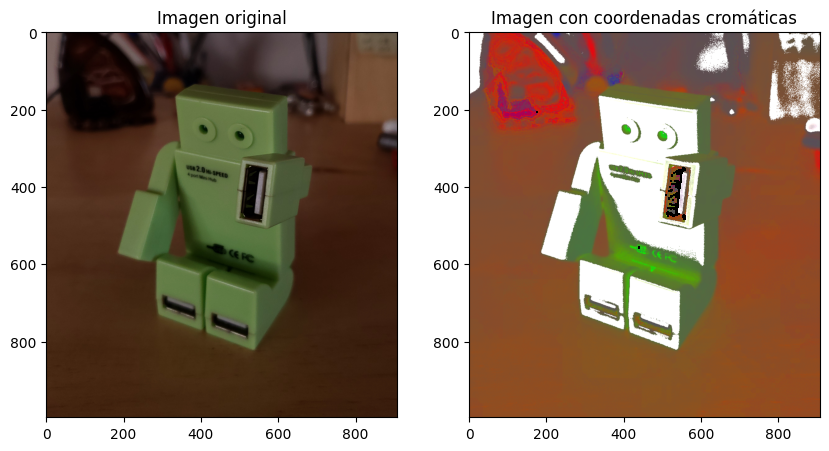

In [26]:
coor_cromaticas(img2)

C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:4: RuntimeWarning: divide by zero encountered in divide
  r = R / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:4: RuntimeWarning: invalid value encountered in divide
  r = R / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:5: RuntimeWarning: divide by zero encountered in divide
  g = G / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:5: RuntimeWarning: invalid value encountered in divide
  g = G / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:6: RuntimeWarning: divide by zero encountered in divide
  b = B / (R + G + B)
C:\Users\leand\AppData\Local\Temp\ipykernel_2628\1196877338.py:6: RuntimeWarning: invalid value encountered in divide
  b = B / (R + G + B)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


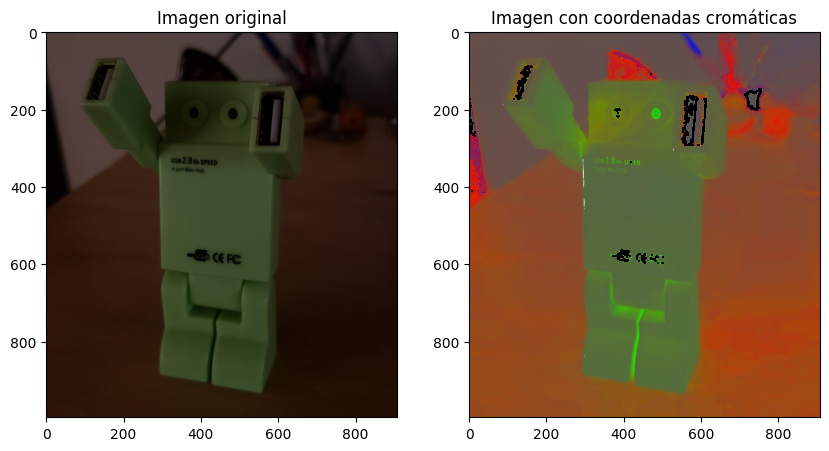

In [27]:
coor_cromaticas(img3)